> PROBLEMA DE NEGÓCIO:
- Aqui o objetivo é analisar dados sobre tráfego aéreo em aeroportos de algumas países pelo mundo
- **Dataset**: dataset5

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# importando os dados
dados = pd.read_csv("dados/dataset5.csv")

In [21]:
dados.shape

(7247, 11)

In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [5]:
dados.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [6]:
# Verificando se existem valores nulos
dados.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [7]:
# Eststísticas
dados.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


#### 01 - Gráfico de barras organizados horizontalmente para analisar tráfego aéreo por país

In [26]:
# Verificando os valores únicos
dados["Country"].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

Text(0, 0.5, 'País')

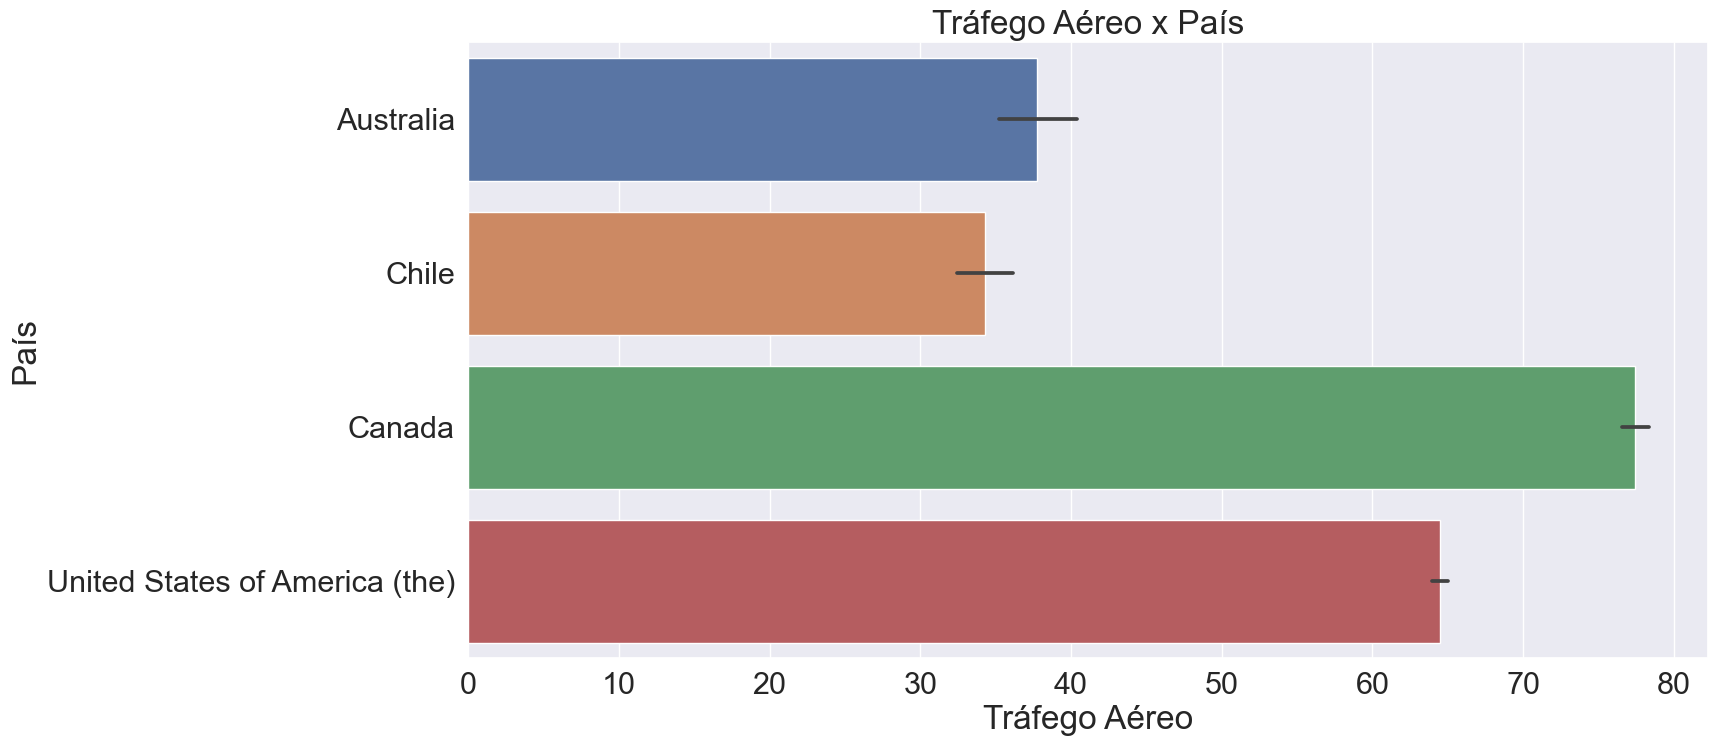

In [27]:
sns.set(font_scale = 2)
plt.figure(figsize = (16,8))
sns.barplot(x = "PercentOfBaseline", y = "Country", data = dados)
plt.title("Tráfego Aéreo x País")
plt.xlabel('Tráfego Aéreo')
plt.ylabel('País')

> Como explicando anteriormente, as barras coloridas indicam os países e as linhas pretas indicam a porcentagem por país

#### 02 - Gráfico de pizza com tráfego aéreo x país (a informação anterior de maneira diferente)

> Para isso é necessário ajustr os dados (criaremos um dataframe com as informações do país e o seaborn se encarrega de atribuir suas proporções)

In [31]:
trafego_paises = dados['Country'].value_counts().to_frame('Count')
trafego_paises

,Count
United States of America (the),4441
Canada,2311
Australia,257
Chile,238


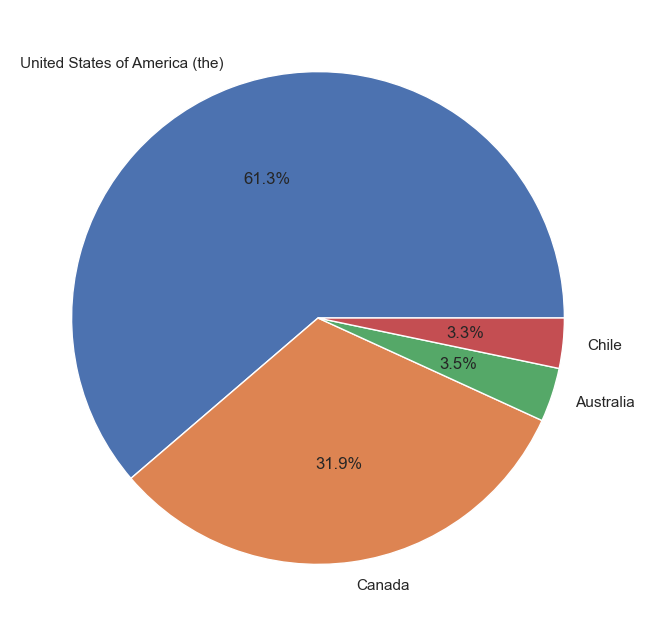

In [32]:
sns.set(font_scale = 1)
plt.figure(figsize= (8, 8))
plt.pie(
    trafego_paises['Count'],
    labels = trafego_paises.index,
    autopct = '%1.1f%%'
)
plt.show()

#### 03 - Gráfico de barras na horizontal com tráfego aéreo x cidade

In [12]:
# Valores únicos de cidades
dados["City"].unique()

array(['Sydney', 'Santiago', 'Calgary', 'Leduc County', 'Richmond',
       'Winnipeg', 'Halifax', 'Mississauga', 'Hamilton', 'Mirabel',
       'Dorval', 'Los Angeles', 'South San Francisco', 'Denver',
       'Miami Springs', 'College Park', 'Urban Honolulu', 'Chicago',
       'Boston', 'Romulus', 'Charlotte', 'Newark', 'Paradise', 'New York',
       'Grapevine', 'Floris', 'SeaTac'], dtype=object)

Text(0, 0.5, 'Cidade')

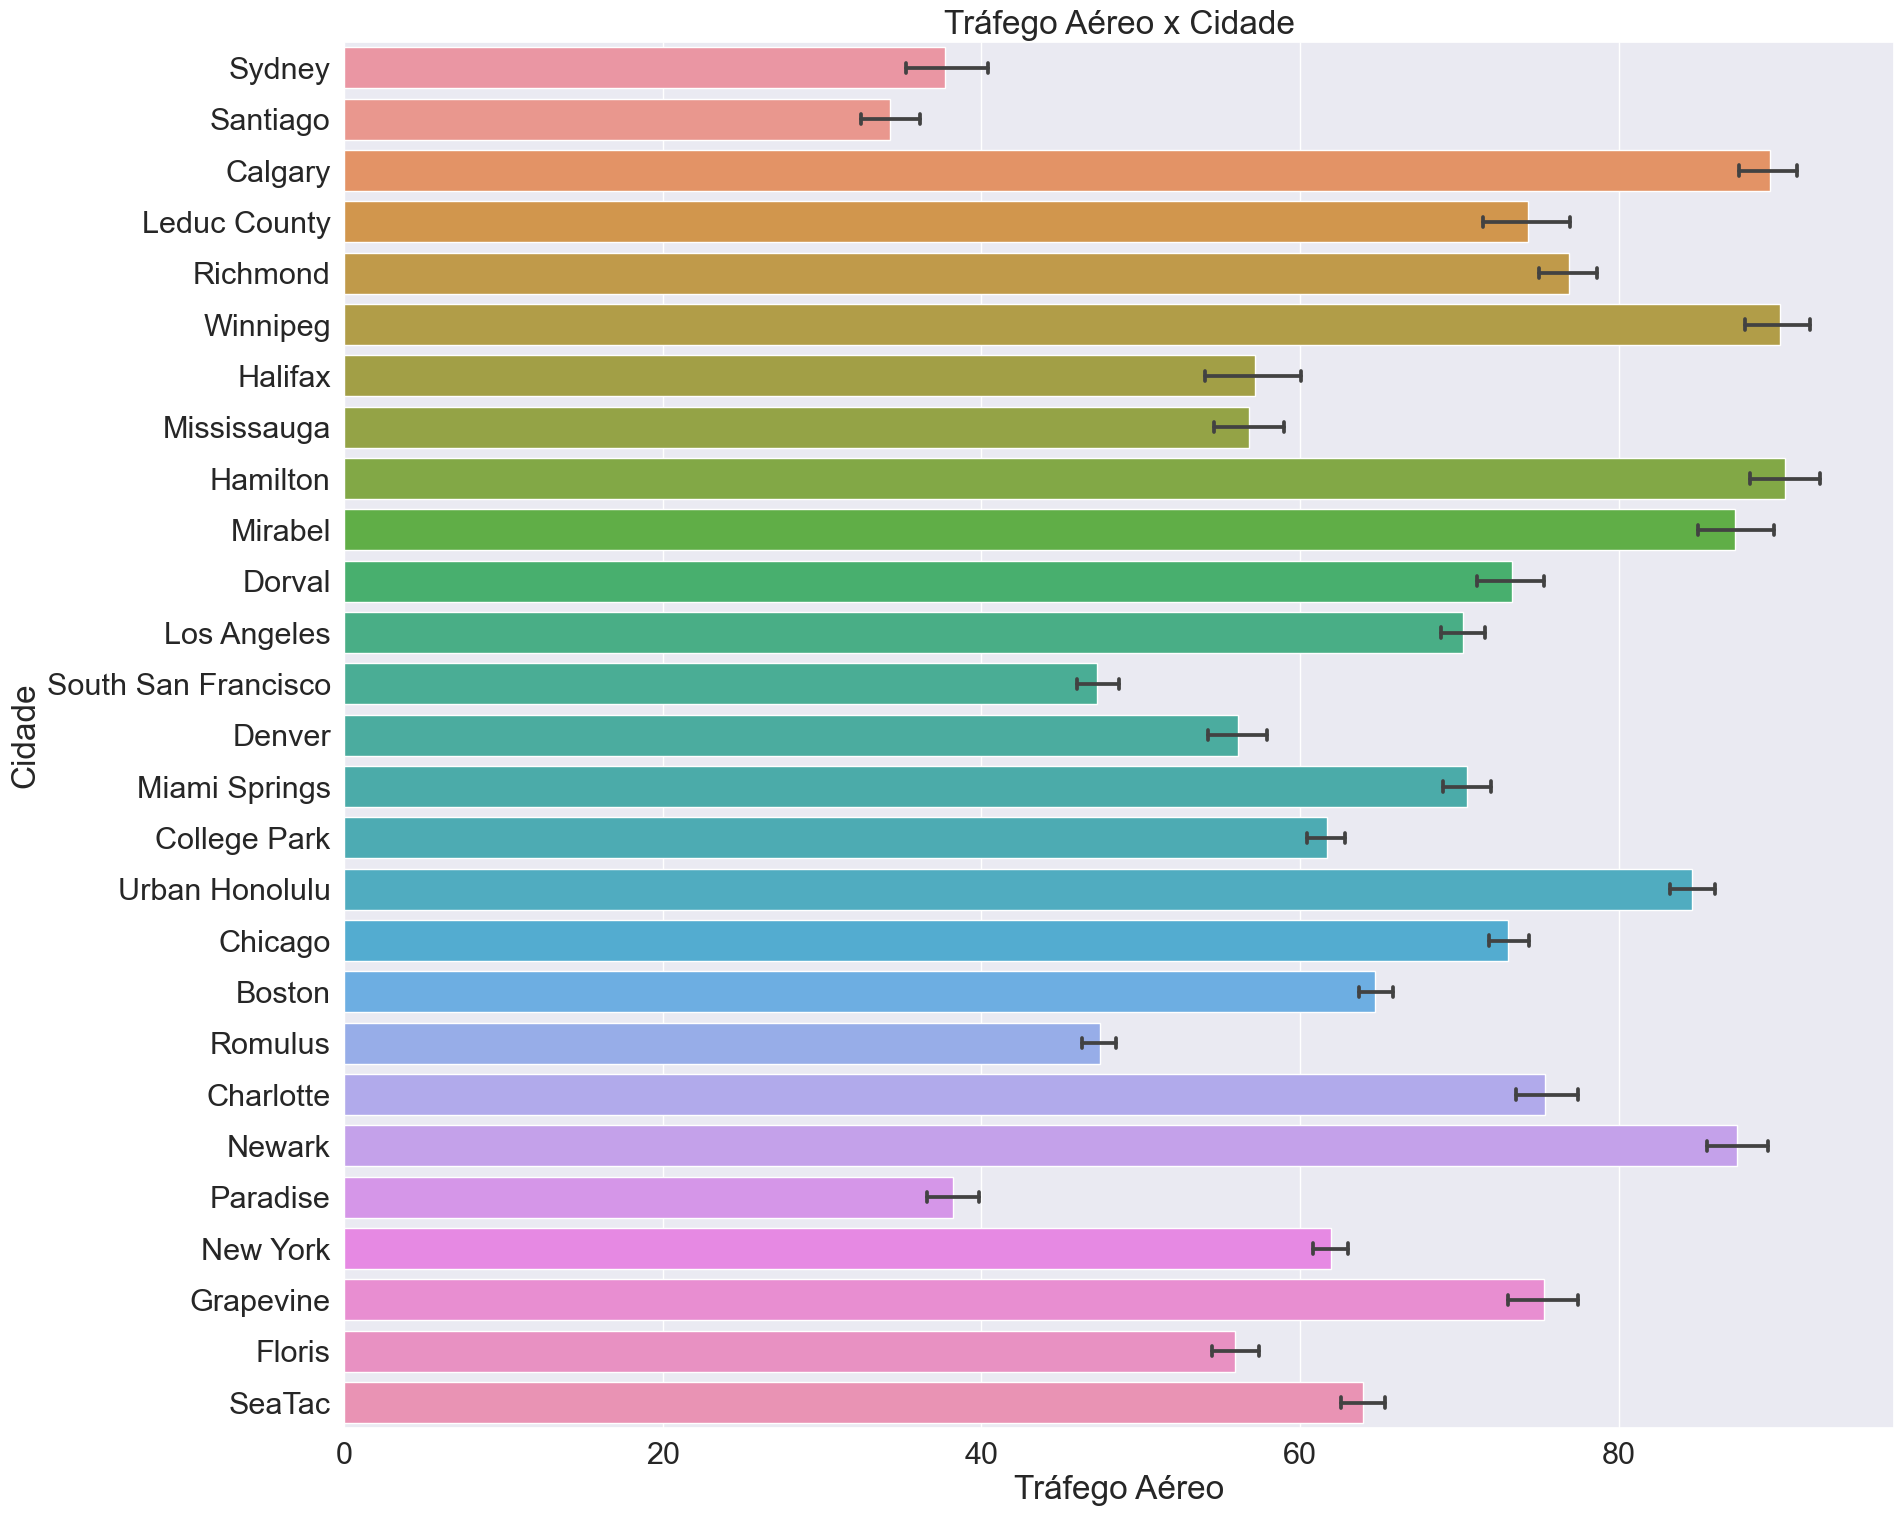

In [33]:
sns.set(font_scale = 2)
plt.figure(figsize = (20,18))
sns.barplot(x = dados.PercentOfBaseline, y = dados.City, capsize = .2)  # capsize é o parâmetro que cria o traço vertical na linha de proporção
plt.title("Tráfego Aéreo x Cidade")
plt.xlabel('Tráfego Aéreo')
plt.ylabel('Cidade')

# INSIGHT: como no gráfico 2 informamos o dataset, não utilizamos dessa forma: dados.City por exemplo

> Um gráfico pouco intuitivo pelo número de barras e as cores (neste caso, aplicadas automaticamente pelo Seaborn)

#### 04 - Gráfico de barras na horizontal com o tráfego aéreo x aeroporto (mais informações mas utilziando a paleta de cores do Seaborn)

In [34]:
# Valores únicos
dados["AirportName"].unique()

array(['Kingsford Smith', 'Santiago International Airport',
       'Calgary International', 'Edmonton International',
       'Vancouver International', 'Winnipeg International',
       'Halifax International', 'Toronto Pearson',
       'Hamilton International', 'Montreal Mirabel', 'Montreal Trudeau',
       'Los Angeles International', 'San Francisco International',
       'Denver International', 'Miami International ',
       'Hartsfield-Jackson Atlanta International ',
       'Daniel K. Inouye International ', 'Chicago OHare International',
       'Boston Logan International ',
       'Detroit Metropolitan Wayne County ',
       'Charlotte Douglas International', 'Newark Liberty International ',
       'McCarran International', 'LaGuardia',
       'John F. Kennedy International',
       'Dallas/Fort Worth International ',
       'Washington Dulles International ',
       'Seattle-Tacoma International '], dtype=object)

Text(0, 0.5, 'Aeroporto')

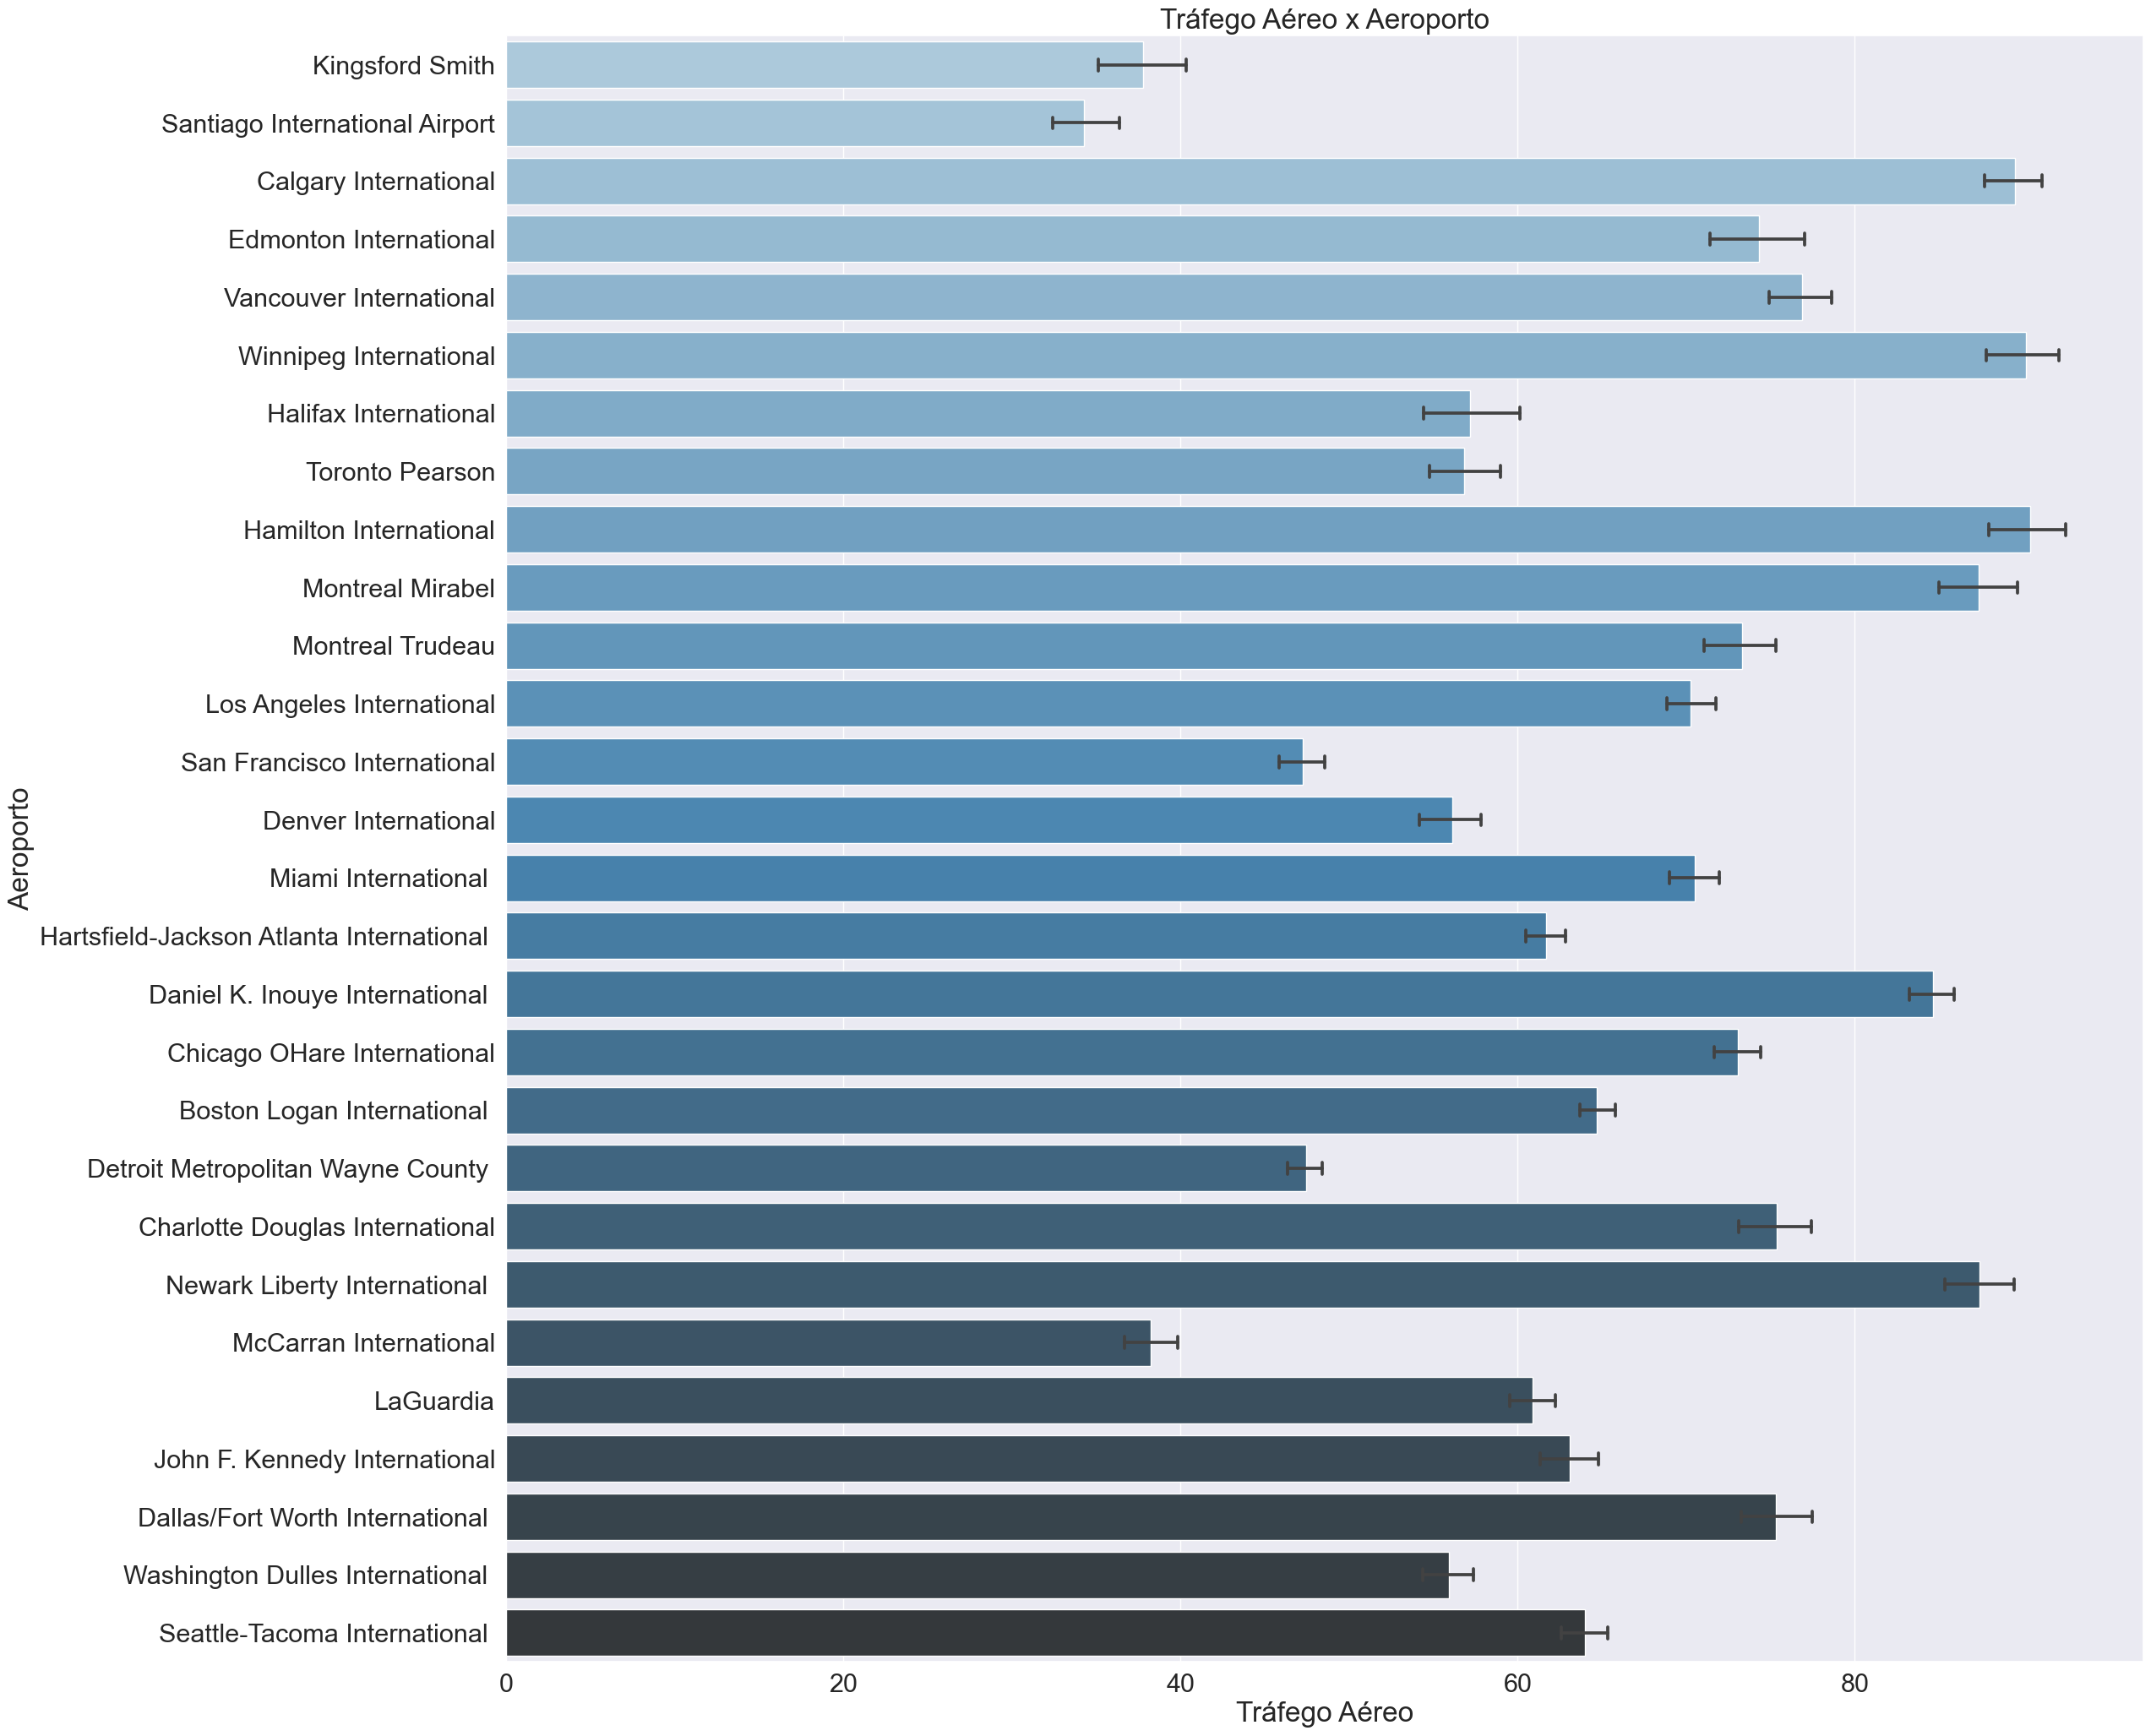

In [35]:
sns.set(font_scale = 2)
plt.figure(figsize = (25,25))
sns.barplot(x = dados.PercentOfBaseline, y = dados.AirportName, palette = "Blues_d", capsize = .2)
plt.title("Tráfego Aéreo x Aeroporto")
plt.xlabel('Tráfego Aéreo')
plt.ylabel('Aeroporto')

> Apesar de mais registros, a visualização se tornou um pouco melhor. Mesmo assim, não é recomendado o seu uso dessa maneira

#### 05 - Scatter Plot com o tráfego aéreo x estado

> Aqui apresentaremos a mesma informação mas utilizando o scatterplot

Text(0, 0.5, 'Estado')

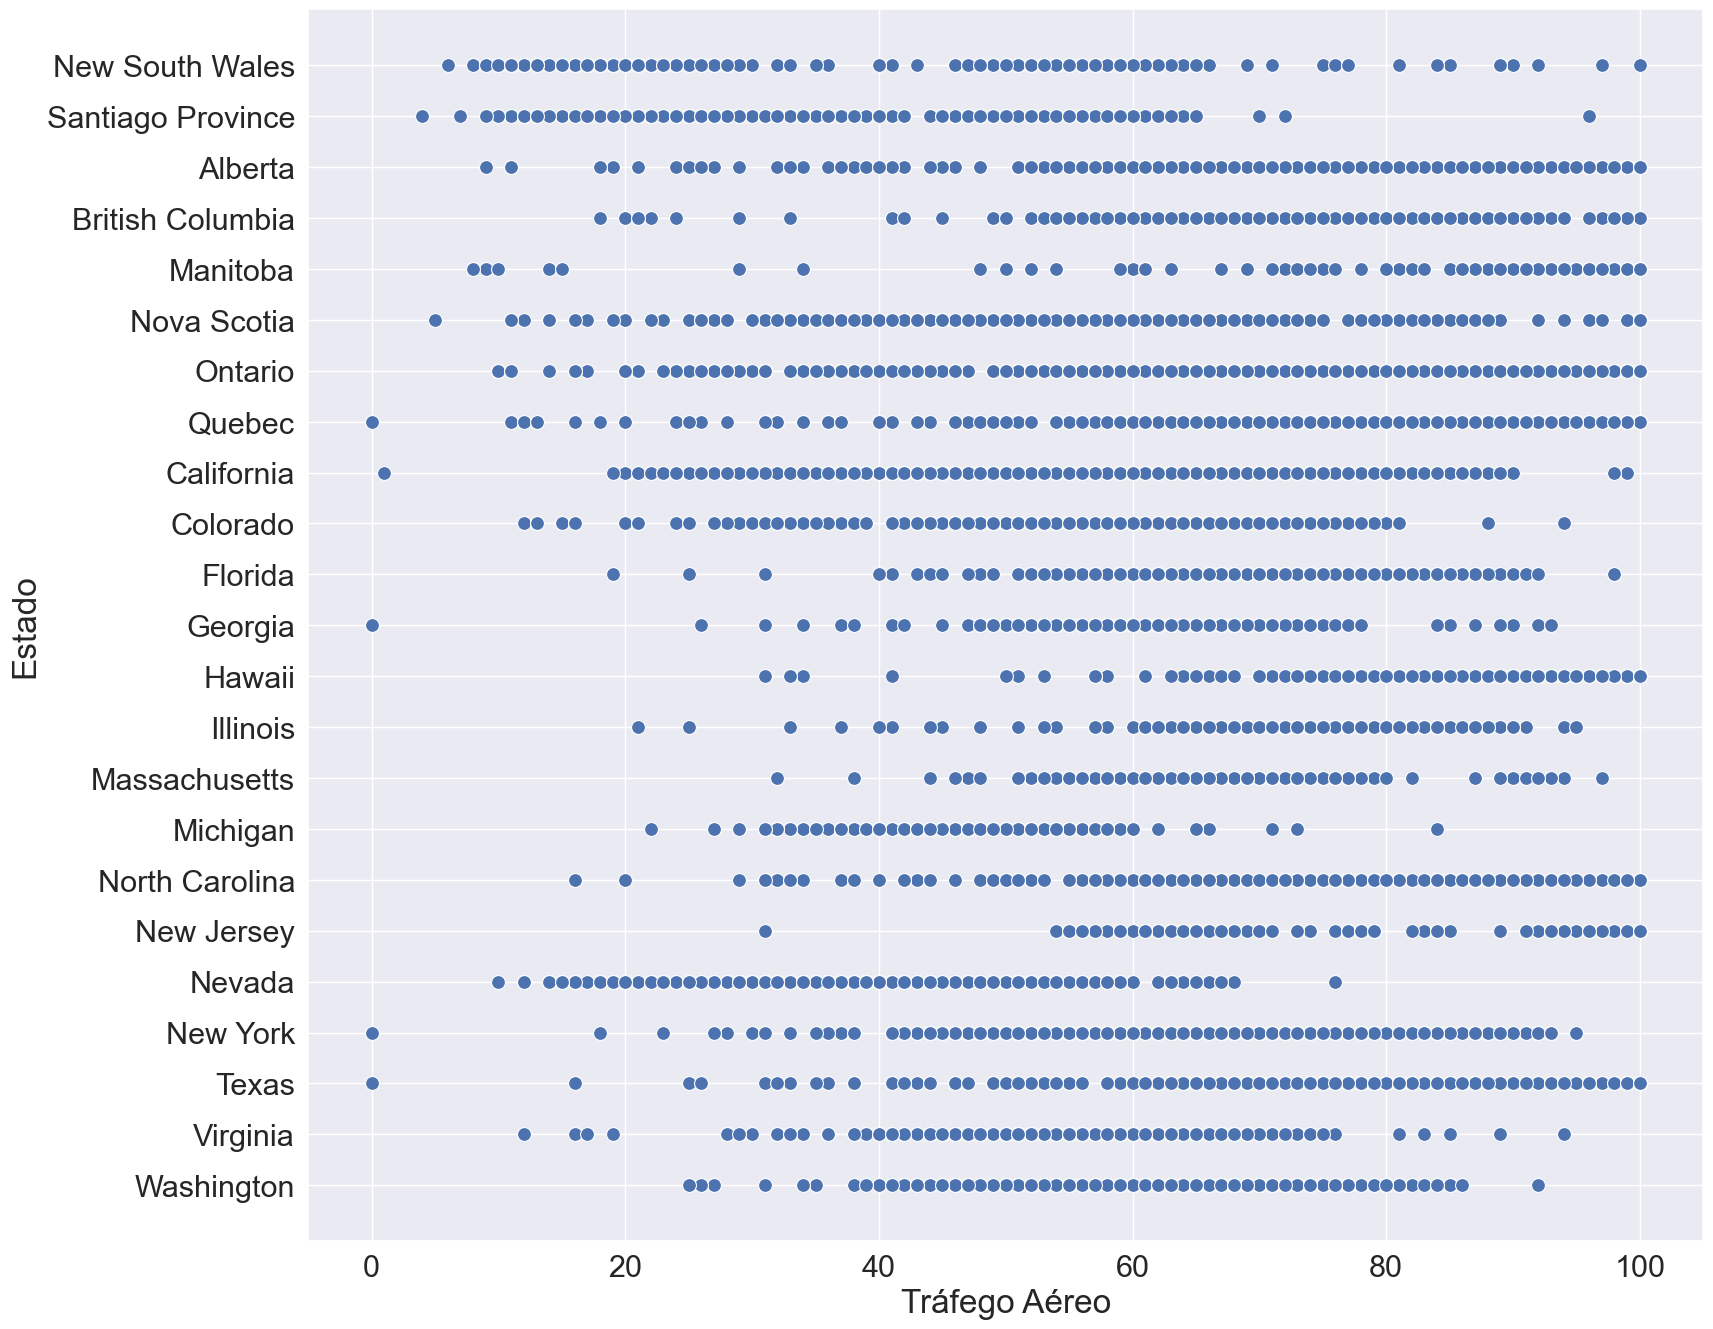

In [36]:
sns.set(font_scale = 2)
plt.figure(figsize = (18,16))
sns.scatterplot(y = dados.State, x = dados.PercentOfBaseline, s = 100)
plt.xlabel('Tráfego Aéreo')
plt.ylabel('Estado')

# Fim